# Quick and Dirty Data Analysis with Pandas
Before you can select and prepare your data for modeling, you need to understand what you’ve got to start with.

If you’re a using the Python stack for machine learning, a library that you can use to better understand your data is Pandas.

In this post you will discover some quick and dirty recipes for Pandas to improve the understanding of your data in terms of it’s structure, distribution and relationships.

## Data Analysis
Data analysis is about asking and answering questions about your data.

As a machine learning practitioner, you may not be very familiar with the domain in which you’re working. It’s ideal to have subject matter experts on hand, but this is not always possible.

These problems also apply when you are learning applied machine learning either with standard machine learning data sets, consulting or working on competition data sets.

You need to spark questions about your data that you can pursue. You need to better understand the data that you have. You can do that by summarizing and visualizing your data.

### Pandas
The Pandas Python library is built for fast data analysis and manipulation. It’s both amazing in its simplicity and familiar if you have worked on this task on other platforms like R.

The strength of Pandas seems to be in the data manipulation side, but it comes with very handy and easy to use tools for data analysis, providing wrappers around standard statistical methods in statsmodels and graphing methods in matplotlib.

### Onset of Diabetes
We need a small dataset that you can use to explore the different data analysis recipes with Pandas.

The UIC Machine Learning repository provides a vast array of different standard machine learning datasets you can use to study and practice applied machine learning. A favorite of mine is the Pima Indians diabetes dataset.

The dataset describes the onset or lack of onset of diabetes in female Pima Indians using details from their medical records.

## Summarize Data
We will start out by understanding the data that we have by looking at it’s structure.

### Load Data
Start by loading the CSV data from file into memory as a data frame. We know the names of the data provided, so we will set those names when loading the data from the file.

In [1]:
import pandas as pd
names = ['preg', 'plas', 'pres', 'skin', 'test', 'mass', 'pedi', 'age', 'class']
data = pd.read_csv('pima-indians-diabetes.data.csv', names=names)

### Describe Data
We can now look at the shape of the data.

We can take a look at the first 60 rows of data by printing the data frame directly.

In [2]:
print(data)

     preg  plas  pres  skin  test  mass   pedi  age  class
0       6   148    72    35     0  33.6  0.627   50      1
1       1    85    66    29     0  26.6  0.351   31      0
2       8   183    64     0     0  23.3  0.672   32      1
3       1    89    66    23    94  28.1  0.167   21      0
4       0   137    40    35   168  43.1  2.288   33      1
5       5   116    74     0     0  25.6  0.201   30      0
6       3    78    50    32    88  31.0  0.248   26      1
7      10   115     0     0     0  35.3  0.134   29      0
8       2   197    70    45   543  30.5  0.158   53      1
9       8   125    96     0     0   0.0  0.232   54      1
10      4   110    92     0     0  37.6  0.191   30      0
11     10   168    74     0     0  38.0  0.537   34      1
12     10   139    80     0     0  27.1  1.441   57      0
13      1   189    60    23   846  30.1  0.398   59      1
14      5   166    72    19   175  25.8  0.587   51      1
15      7   100     0     0     0  30.0  0.484   32     

We can see that all of the data is numeric and that the class value on the end is the dependent variable that we want to make predictions about.

At the end of the data dump we can see the description of the data frame itself as a 768 rows and 9 columns. So now we have idea of the shape of our data.

Next we can get a feeling for the distribution of each attribute by reviewing summary statistics.

In [3]:
print(data.describe())

             preg        plas        pres        skin        test        mass  \
count  768.000000  768.000000  768.000000  768.000000  768.000000  768.000000   
mean     3.845052  120.894531   69.105469   20.536458   79.799479   31.992578   
std      3.369578   31.972618   19.355807   15.952218  115.244002    7.884160   
min      0.000000    0.000000    0.000000    0.000000    0.000000    0.000000   
25%      1.000000   99.000000   62.000000    0.000000    0.000000   27.300000   
50%      3.000000  117.000000   72.000000   23.000000   30.500000   32.000000   
75%      6.000000  140.250000   80.000000   32.000000  127.250000   36.600000   
max     17.000000  199.000000  122.000000   99.000000  846.000000   67.100000   

             pedi         age       class  
count  768.000000  768.000000  768.000000  
mean     0.471876   33.240885    0.348958  
std      0.331329   11.760232    0.476951  
min      0.078000   21.000000    0.000000  
25%      0.243750   24.000000    0.000000  
50%   

This displays a table of detailed distribution information for each of the 9 attributes in our data frame. Specifically: the count, mean, standard deviation, min, max, and 25th, 50th (median), 75th percentiles.

We can review these statistics and start noting interesting facts about our problem. Such as the average number of pregnancies is 3.8, the minimum age is 21 and some people have a body mass index of 0, which is impossible and a sign that some of the attribute values should be marked as missing.

## Visualize Data
A graph is a lot more telling about the distribution and relationships of attributes.

Nevertheless, it is important to take your time and review the statistics first. Each time you review the data a different way, you open yourself up to noticing different aspects and potentially achieving different insights into the problem.

### Feature Distributions
The first and easy property to review is the distribution of each attribute.

We can start out and review the spread of each attribute by looking at box and whisker plots.

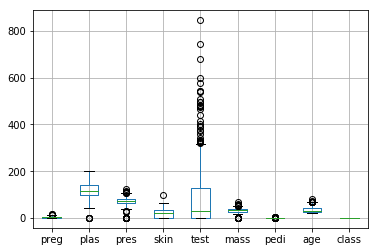

In [5]:
import matplotlib.pyplot as plt
data.boxplot()

We can see that the test attribute has a lot of outliers. We can also see that the plas attribute seems to have a relatively even normal distribution. We can also look at the distribution of each attribute by discretization the values into buckets and review the frequency in each bucket as histograms.

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x1080c8908>,
      dtype=object)

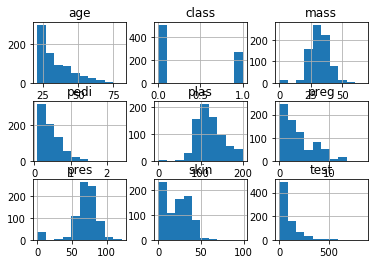

In [6]:
data.hist()

This lets you note interesting properties of the attribute distributions such as the possible normal distribution of attributes like pres and skin.

### Feature-Class Relationships
The next important relationship to explore is that of each attribute to the class attribute.

One approach is to visualize the distribution of attributes for data instances for each class and note and differences. You can generate a matrix of histograms for each attribute and one matrix of histograms for each class value, as follows:

class
0    [[AxesSubplot(0.125,0.670278;0.215278x0.209722...
1    [[AxesSubplot(0.125,0.670278;0.215278x0.209722...
dtype: object

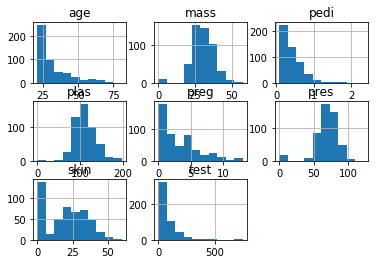

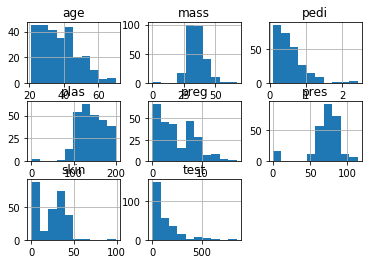

In [7]:
data.groupby('class').hist()

The data is grouped by the class attribute (two groups) then a matrix of histograms is created for the attributes is in each group. The result is two images.

This helps to point out differences in the distributions between the classes like those for the plas attribute.

You can better contrast the attribute values for each class on the same plot:

class
0    AxesSubplot(0.125,0.125;0.775x0.755)
1    AxesSubplot(0.125,0.125;0.775x0.755)
Name: plas, dtype: object

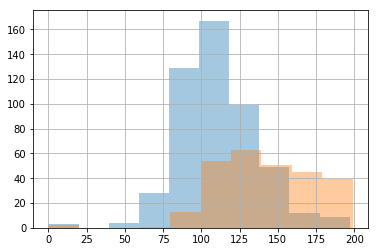

In [8]:
data.groupby('class').plas.hist(alpha=0.4)

This groups the data by class by only plots the histogram of plas showing the class value of 0 in red and the class value of 1 in blue. You can see a similar shaped normal distribution, but a shift. This attribute is likely going to be useful to discriminate the classes.

### Feature-Feature Relationships
The final important relationship to explore is that of the relationships between the attributes.

We can review the relationships between attributes by looking at the distribution of the interactions of each pair of attributes.

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x108cfa4e0>,
      dtype=object)

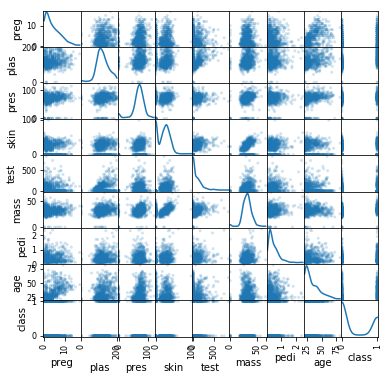

In [9]:
from pandas.plotting import scatter_matrix
scatter_matrix(data, alpha=0.2, figsize=(6, 6), diagonal='kde')

This uses a built function to create a matrix of scatter plots of all attributes versus all attributes. The diagonal where each attribute would be plotted against itself shows the Kernel Density Estimation of the attribute instead.

This is a powerful plot from which a lot of inspiration about the data can be drawn. For example, we can see a possible correlation between age and preg and another possible relationship between skin and mass.

## Summary
We have covered a lot of ground in this post.

We started out looking at quick and dirty one-liners for loading our data in CSV format and describing it using summary statistics.

Next we looked at various different approaches to plotting our data to expose interesting structures. We looked at the distribution of the data in box and whisker plots and histograms, then we looked at the distribution of attributes compared to the class attribute and finally at the relationships between attributes in pair-wise scatter plots.